In [1]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableUnCLIPImg2ImgPipeline
import time

start_time = time.time()
#Start the StableUnCLIP Image variations pipeline
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
pipe = pipe.to("cuda")
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Model Loading time: {elapsed_time}")

/fs01/home/fforghani/my_genssl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/fs01/home/fforghani/my_genssl/lib/python3.9/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 9/9 [00:20<00:00,  2.33s/it]


Model Loading time: 27.94205117225647


In [2]:
from torchvision import datasets, transforms
from torchvision.transforms import transforms

s = 1
size = 128
color_jitter = transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
transform_list = [
    transforms.Resize(size=(size,size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
]
transform = transforms.Compose(transform_list)

imagenet_dataset = datasets.ImageNet("/scratch/ssd004/datasets/imagenet256", split="train",transform = transform)

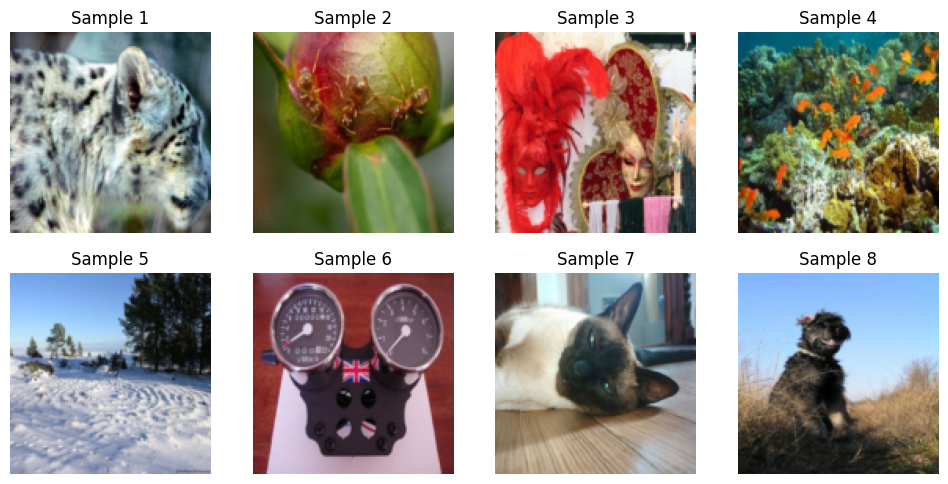

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import time

# Create a data loader
batch_size = 8
data_loader = DataLoader(imagenet_dataset, batch_size=batch_size, shuffle=True)

plt.figure(figsize=(12, 12))

# Visualize 10 samples
batch, label = next(iter(data_loader))
for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(np.transpose(batch[i], (1, 2, 0)))  # Assuming grayscale images
    plt.title(f'Sample {i+1}')
    plt.axis('off')
plt.show()

In [ ]:
def plot_images(images):
    plt.figure(figsize=(12, 12))
    
    # Visualize 10 samples
    for i in range(batch_size):
        plt.subplot(4, 4, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f'Sample {i+1}')
        plt.axis('off')
    plt.show()

In [4]:
def sample_with_unclip(batch):
    transform_1 = transforms.ToPILImage()
    transform_2 = transforms.ToTensor()
    
    synth_images = []
    sum_time = 0
    for i in range(batch_size):
        init_image = transform_1(batch[i])
        
        start_time = time.time()
        images = pipe(init_image).images[0]
        end_time = time.time()
        
        synth_image = transform_2(images.resize((128, 128)))    
        synth_images.append(synth_image)
        
        
        elapsed_time = end_time - start_time
        sum_time += elapsed_time
        print(f"Sampling time: {elapsed_time}")
    print(f"Total sampling time for {batch_size} images: {sum_time}")
    synth_images = torch.stack(synth_images)
    return synth_images

In [10]:
synth_images_1 = sample_with_unclip(batch)

100%|██████████| 21/21 [00:06<00:00,  3.13it/s]


Sampling time: 7.327576637268066


100%|██████████| 21/21 [00:06<00:00,  3.12it/s]


Sampling time: 7.3521692752838135


100%|██████████| 21/21 [00:06<00:00,  3.08it/s]


Sampling time: 7.4114696979522705


100%|██████████| 21/21 [00:06<00:00,  3.08it/s]


Sampling time: 7.454566955566406


100%|██████████| 21/21 [00:06<00:00,  3.04it/s]


Sampling time: 7.528700590133667


100%|██████████| 21/21 [00:06<00:00,  3.03it/s]


Sampling time: 7.565425634384155


100%|██████████| 21/21 [00:06<00:00,  3.03it/s]


Sampling time: 7.547765254974365


100%|██████████| 21/21 [00:06<00:00,  3.01it/s]


Sampling time: 7.564613103866577
Total sampling time for 8 images: 59.75228714942932


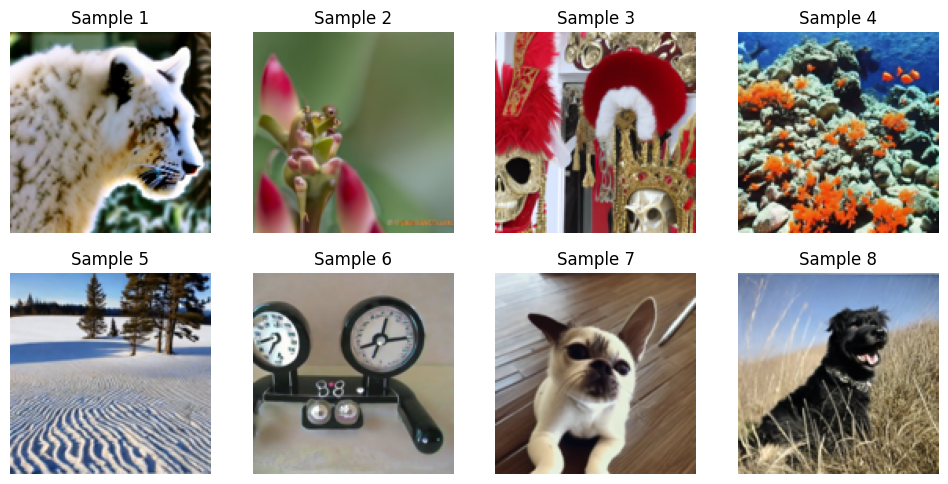

In [14]:
plot_images(synth_images_1)

In [11]:
synth_images_2 = sample_with_unclip(batch)

100%|██████████| 21/21 [00:07<00:00,  3.00it/s]


Sampling time: 7.618710041046143


100%|██████████| 21/21 [00:07<00:00,  2.97it/s]


Sampling time: 7.700623989105225


100%|██████████| 21/21 [00:07<00:00,  2.90it/s]


Sampling time: 8.055951118469238


100%|██████████| 21/21 [00:07<00:00,  2.93it/s]


Sampling time: 7.983449220657349


100%|██████████| 21/21 [00:07<00:00,  2.88it/s]


Sampling time: 7.975896120071411


100%|██████████| 21/21 [00:07<00:00,  2.94it/s]


Sampling time: 7.79758358001709


100%|██████████| 21/21 [00:07<00:00,  2.93it/s]


Sampling time: 7.813865423202515


100%|██████████| 21/21 [00:07<00:00,  2.91it/s]


Sampling time: 7.894655466079712
Total sampling time for 8 images: 62.84073495864868


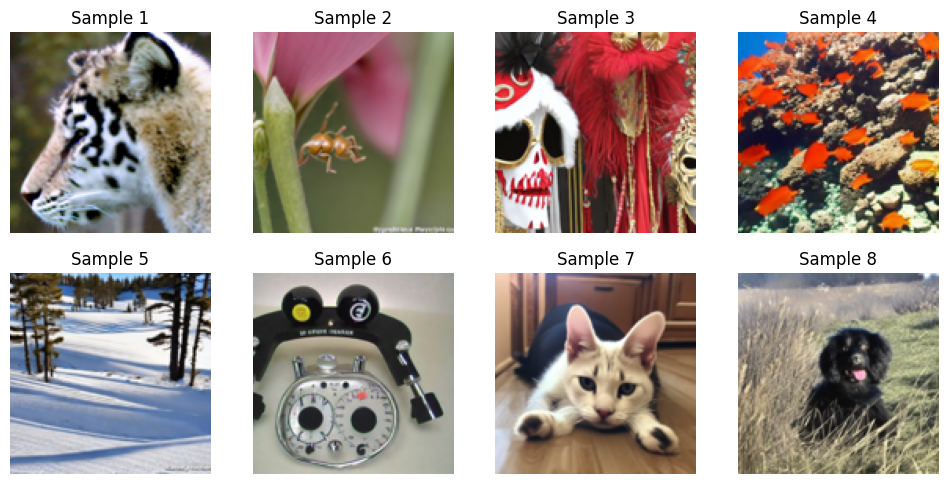

In [15]:
plot_images(synth_images_2)

In [12]:
synth_images_3 = sample_with_unclip(batch)

100%|██████████| 21/21 [00:07<00:00,  2.90it/s]


Sampling time: 7.877530574798584


100%|██████████| 21/21 [00:07<00:00,  2.89it/s]


Sampling time: 7.876655101776123


100%|██████████| 21/21 [00:07<00:00,  2.87it/s]


Sampling time: 8.005727767944336


100%|██████████| 21/21 [00:07<00:00,  2.86it/s]


Sampling time: 7.983736276626587


100%|██████████| 21/21 [00:07<00:00,  2.84it/s]


Sampling time: 8.043726444244385


100%|██████████| 21/21 [00:07<00:00,  2.83it/s]


Sampling time: 8.081878900527954


100%|██████████| 21/21 [00:07<00:00,  2.67it/s]


Sampling time: 9.001774311065674


100%|██████████| 21/21 [00:15<00:00,  1.36it/s]


Sampling time: 16.731391668319702
Total sampling time for 8 images: 73.60242104530334


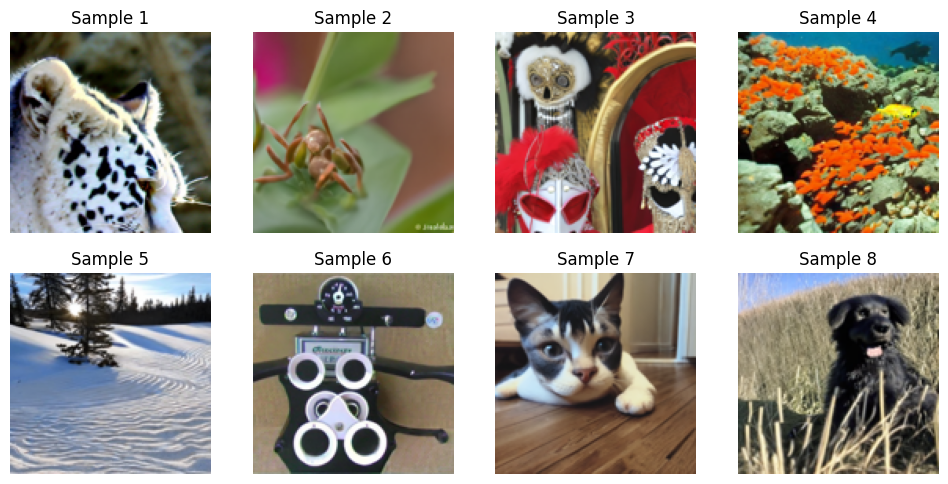

In [16]:
plot_images(synth_images_3)